In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.segmentation import slic
from skimage.filters import threshold_local
from skimage.color import label2rgb
from PIL import Image


import pytesseract

import matplotlib.pyplot as plt
%matplotlib inline


import mahotas

import support_library

In [ ]:
def opencv_resize(image, ratio):
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [ ]:
# Sample file out of the dataset
file_name = './Images/img1.jpg'
img = Image.open(file_name)
img.thumbnail((800,800), Image.ANTIALIAS)
img

In [ ]:
image = cv2.imread(file_name)


# Downscale image as finding receipt contour is more efficient on a small image
resize_ratio = 500 / image.shape[0]
original = image.copy()
image = opencv_resize(image, resize_ratio)


In [ ]:
# Convert to grayscale for further processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plot_rgb(gray)

In [ ]:
# Get rid of noise with Gaussian Blur filter
blurred = cv2.GaussianBlur(gray, (9, 9), 0)
plot_gray(blurred)

In [ ]:
# Detect white regions
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
dilated = cv2.dilate(blurred, rectKernel)
plot_gray(dilated)

In [ ]:
edged = cv2.Canny(dilated, 100, 200, apertureSize=3)
plot_gray(edged)

In [ ]:
# Detect all contours in Canny-edged image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
plot_rgb(image_with_contours)

In [ ]:
# Get 10 largest contours
largest_contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
image_with_largest_contours = cv2.drawContours(image.copy(), largest_contours, -1, (0,255,0), 3)
plot_rgb(image_with_largest_contours)

In [1]:
import pytesseract
from pytesseract import Output

In [5]:
import pytesseract

# Set the path to the Tesseract executable (update this with your Tesseract installation path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Example path on Windows

# Rest of your code for image processing and text extraction


In [2]:
import pytesseract
import re

from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Example path on Windows


def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

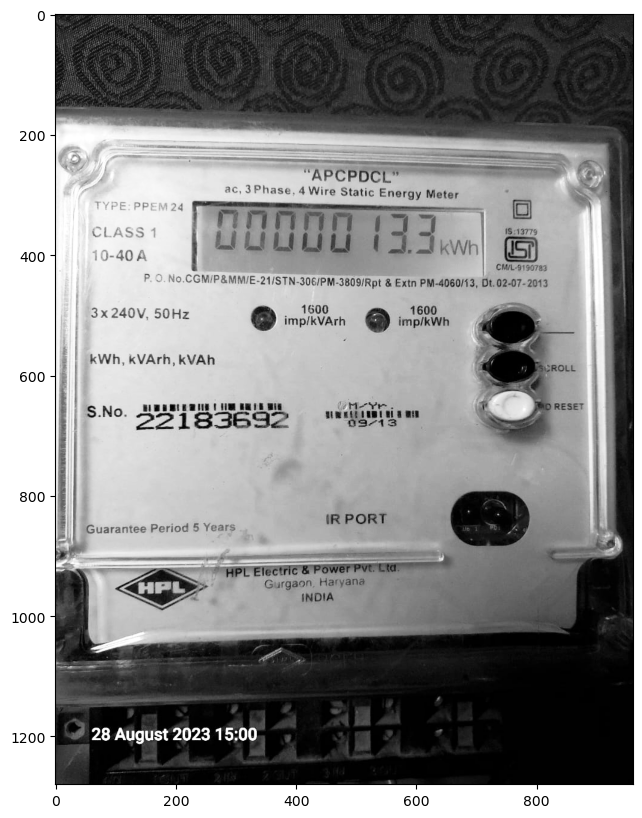

In [12]:
# Sample file out of the dataset
file_name = './Images/img1.jpg'
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

In [25]:
image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
#plot_gray(image)



In [26]:
THRESH_BINARY

NameError: name 'THRESH_BINARY' is not defined

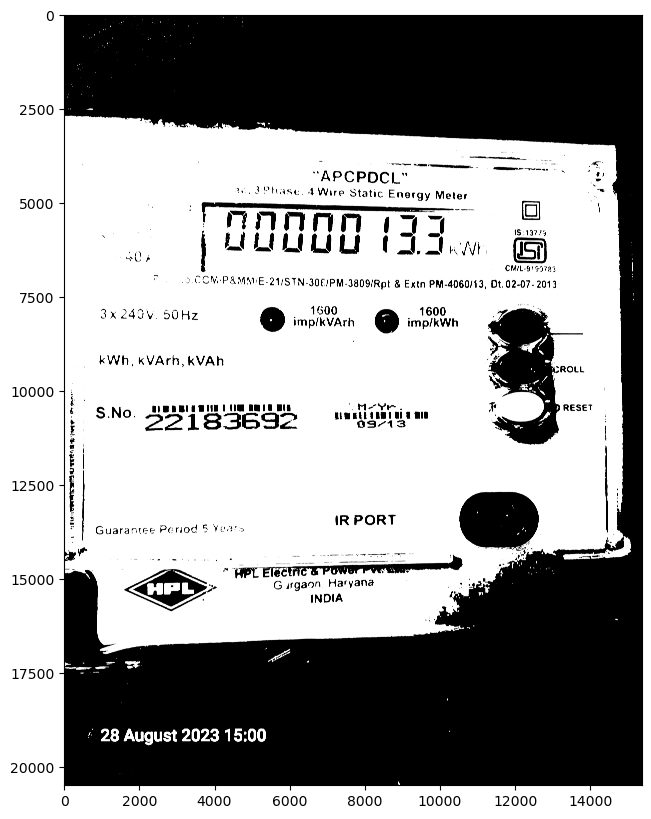

In [27]:

# Apply thresholding (adjust parameters as needed)
_, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot_gray(thresholded_image)

In [28]:
text = pytesseract.image_to_string(thresholded_image)

In [29]:
text

'OCCMIPS VAAL EF | PSIG S\nSMAVE-21/STN-306/PM-3809/Rpt & Extn PM-4060/13, Dt. 02-07-2013\n3x 240V. 50H 160 =\n. 7 500 a\nen: ee\n\nkWh, kKVArh, KVAh\n\nS No. essen lie TRB  -M-vr .\n\n, SN 32183692 "eae\n\n‘ 28 August 2023 15:00\n\n'

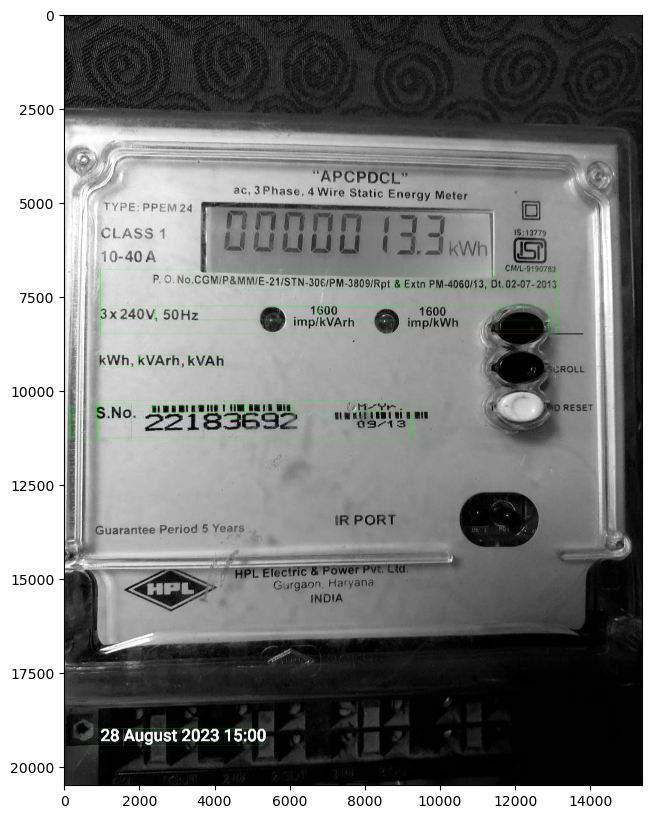

In [31]:
d = pytesseract.image_to_data(thresholded_image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

In [9]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

“XPEPDGL™ . gh
\

c, 3Phase, 4 Wire Static Energy Meter

404

‘TRANNA Ta
| MUU tdi

re) CGM/P&MM/E-21/STN-306/PM-3809/Rpt & Extn PM-4060/13, Dt.02-07-2013
ee 1600 4600
3x 240V, 50Hz @ mpiRVATA @ imp/kWh

kWh, kVArh, KVAh

TICE LEA Bek THREE

(R PORT

Guarantee Period 5 Years

Gurgaon, Haryana
INDIA

* 28 August 2023 15:00



In [10]:
import re

# Extract numeric characters using regular expression
numeric_text = ''.join(re.findall(r'\d+', extracted_text))

In [11]:
numeric_text

'34404213063809406013020720131600460032405052820231500'